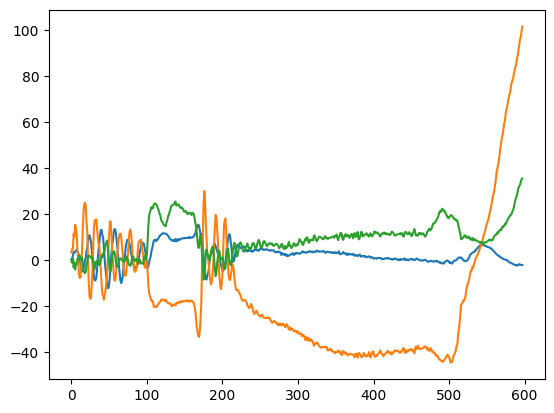

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import json
def load_tight_data(loader_id: str, trace_id: str):
    with open(f"../data/{loader_id}/LOG_PACK_{trace_id}.json", "r") as f:
        data = json.load(f)
    tight_packing_data = data["msg"]["tightpack"]
    return tight_packing_data
data = load_tight_data('drex1', '1cb014197a16dbf6') # success tight pack
# data = load_tight_data('drex1', 'e68fd5e0e7d6e519') # dexcore V2

force = data["force"]
curr_pos_list = np.array(data["curr_pos"])
plt.plot(force)

In [ ]:
# data = load_tight_data('drex1', '1cb014197a16dbf6') # success tight pack
# data = load_tight_data('drex1', 'e68fd5e0e7d6e519') # dexcore V2
# data = load_tight_data('drex8', '94fe625ae06e3584')
data = load_tight_data('drex8', '67dee0b708b2a6ca')
# data = load_tight_data('drex8', 'cdf8e90e96aef9bc')
# data = load_tight_data('drex8', '882e0cef5a1de840')
# data = load_tight_data('drex8', 'cf8edcf598109927')


force = data["force"]
curr_pos = np.array(data["curr_pos"])

def visualize_2D_path(curr_pos):
    plt.figure(figsize=(10, 4))
    colors = np.linspace(0, 1, len(curr_pos))
    plt.scatter(curr_pos[:, 1], curr_pos[:, 2], marker='.', c=colors, s=25, cmap=plt.get_cmap('cool'))
    plt.colorbar(label='Start to end')
    plt.xlabel('y (m)')
    plt.ylabel('z (m)')

visualize_2D_path(curr_pos)

def compute_refined_path(curr_pos):
    if len(curr_pos) == 0:
        return []
    
    refined_pos = [curr_pos[0]]
    i = 0
    for _ in range(len(refined_pos)):
        next

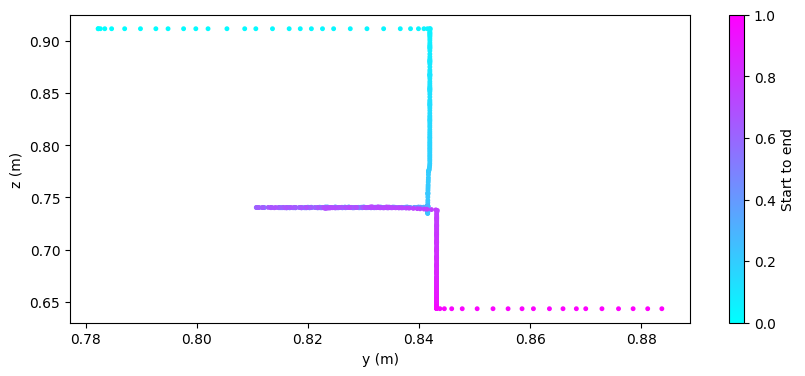

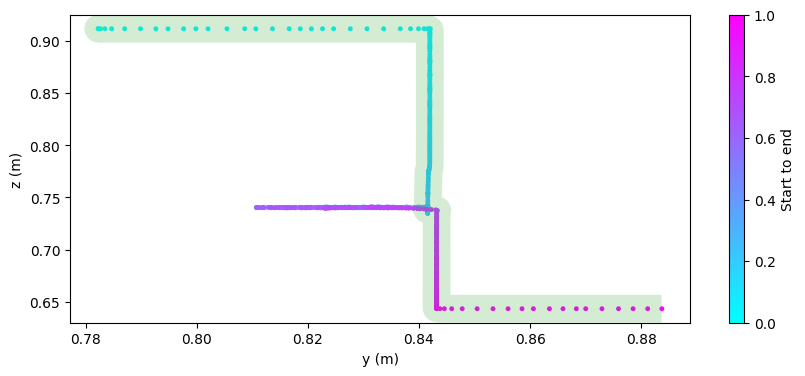

In [213]:
# data = load_tight_data('drex1', '1cb014197a16dbf6') # success tight pack
# data = load_tight_data('drex1', 'e68fd5e0e7d6e519') # dexcore V2
# data = load_tight_data('drex8', '94fe625ae06e3584')
# data = load_tight_data('drex8', '67dee0b708b2a6ca')
# data = load_tight_data('drex8', 'cdf8e90e96aef9bc')
data = load_tight_data('drex8', '882e0cef5a1de840')
# data = load_tight_data('drex8', 'cf8edcf598109927')
data = load_tight_data('drex8', 'fd291f966028e2c8')
# data = load_tight_data('drex8', 'dda7fcfbaa57c36a')




force = data["force"]
curr_pos = np.array(data["curr_pos"])

def visualize_2D_path(curr_pos, refined_path=None):
    plt.figure(figsize=(10, 4))
    colors = np.linspace(0, 1, len(curr_pos))
    plt.scatter(curr_pos[:, 1], curr_pos[:, 2], marker='.', c=colors, s=25, cmap=plt.get_cmap('cool'))
    if refined_path is not None:
        plt.plot(refined_path[:, 1], refined_path[:, 2], '-', color='C2', linewidth=20, alpha=0.2)
        
    plt.colorbar(label='Start to end')
    plt.xlabel('y (m)')
    plt.ylabel('z (m)')

def compute_next_idx(curr_pos, refined_pos, radius):
    distance = np.linalg.norm(curr_pos - refined_pos, axis=-1)
    idx_array = np.arange(len(distance))
    next_pos_idx = np.argmax((distance <= radius) * idx_array)
    argmin_j = 0
    min_distance = np.inf
    for j in range(next_pos_idx, -1, -1):
        if distance[j] > radius:
            break
        total_distance = distance[j] + np.linalg.norm(curr_pos[j] - curr_pos[next_pos_idx]) * 0.8
        if total_distance < min_distance:
            min_distance = total_distance
            argmin_j = j
    return argmin_j
    

def compute_refined_path(curr_pos, radius=0.025, distance_per_step=0.005):
    if len(curr_pos) == 0:
        return []
    
    refined_pos = [curr_pos[0]]
    i = 0
    for _ in range(len(curr_pos)):
        i = i + 1 + compute_next_idx(curr_pos[i+1:], refined_pos[-1], radius)
        if i >= len(curr_pos) - 1:
            break
        refined_pos.append(curr_pos[i])
    return np.array(refined_pos)

refined_path = compute_refined_path(curr_pos)
visualize_2D_path(curr_pos)
visualize_2D_path(curr_pos, refined_path)
# visualize_2D_path(refined_path)